In [12]:
import os
import numpy as np
import pandas as pd
from Bio import SeqIO
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Patch
import mpl_stylesheet
import re
import gc
mpl_stylesheet.banskt_presentation(fontfamily = 'mono', fontsize = 20, colors = 'banskt', dpi = 300)

In [1]:
# Load the data
import json

disprot_file = "AF2_testset.json"
with open(disprot_file) as infmt:
    disprot_dict = json.load(infmt)
    
monomer_file = "monomer_datadict.json"
with open(monomer_file) as infmt:
    monomer_dict = json.load(infmt)

with open("monomer_multi_loss.json") as infmt:
    mono_loss = json.load(infmt)
    
with open("disprot_multi_loss.json") as infmt:
    disprot_loss = json.load(infmt)
    
with open("monomer_multi_mismatch.json") as infmt:
    mono_mismatch = json.load(infmt)
    
with open("disprot_multi_mismatch.json") as infmt:
    disprot_mismatch = json.load(infmt)

In [15]:
mono_allloss = list()
disprot_allloss = list()
for protid in mono_loss.keys():
    mono_allloss += mono_loss[protid]['aa1_loss']
    
for protid in disprot_loss.keys():
    disprot_allloss += disprot_loss[protid]['aa1_loss']

/home/franco/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/franco/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/franco/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/franco/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

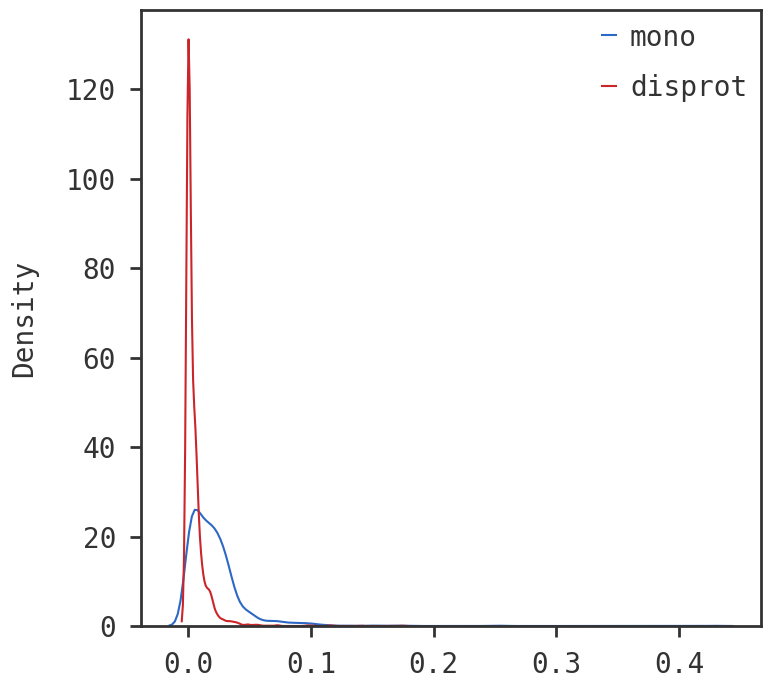

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(dpi=100)
sns.kdeplot(mono_allloss, label="mono")
sns.kdeplot(disprot_allloss, label="disprot")
plt.legend()
plt.show()

In [17]:
mono_allfiveloss = list()
disprot_allfiveloss = list()
for protid in mono_loss.keys():
    mono_allfiveloss += mono_loss[protid]['aa5_loss']
    
for protid in disprot_loss.keys():
    disprot_allfiveloss += disprot_loss[protid]['aa5_loss']

/home/franco/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/franco/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/franco/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/franco/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

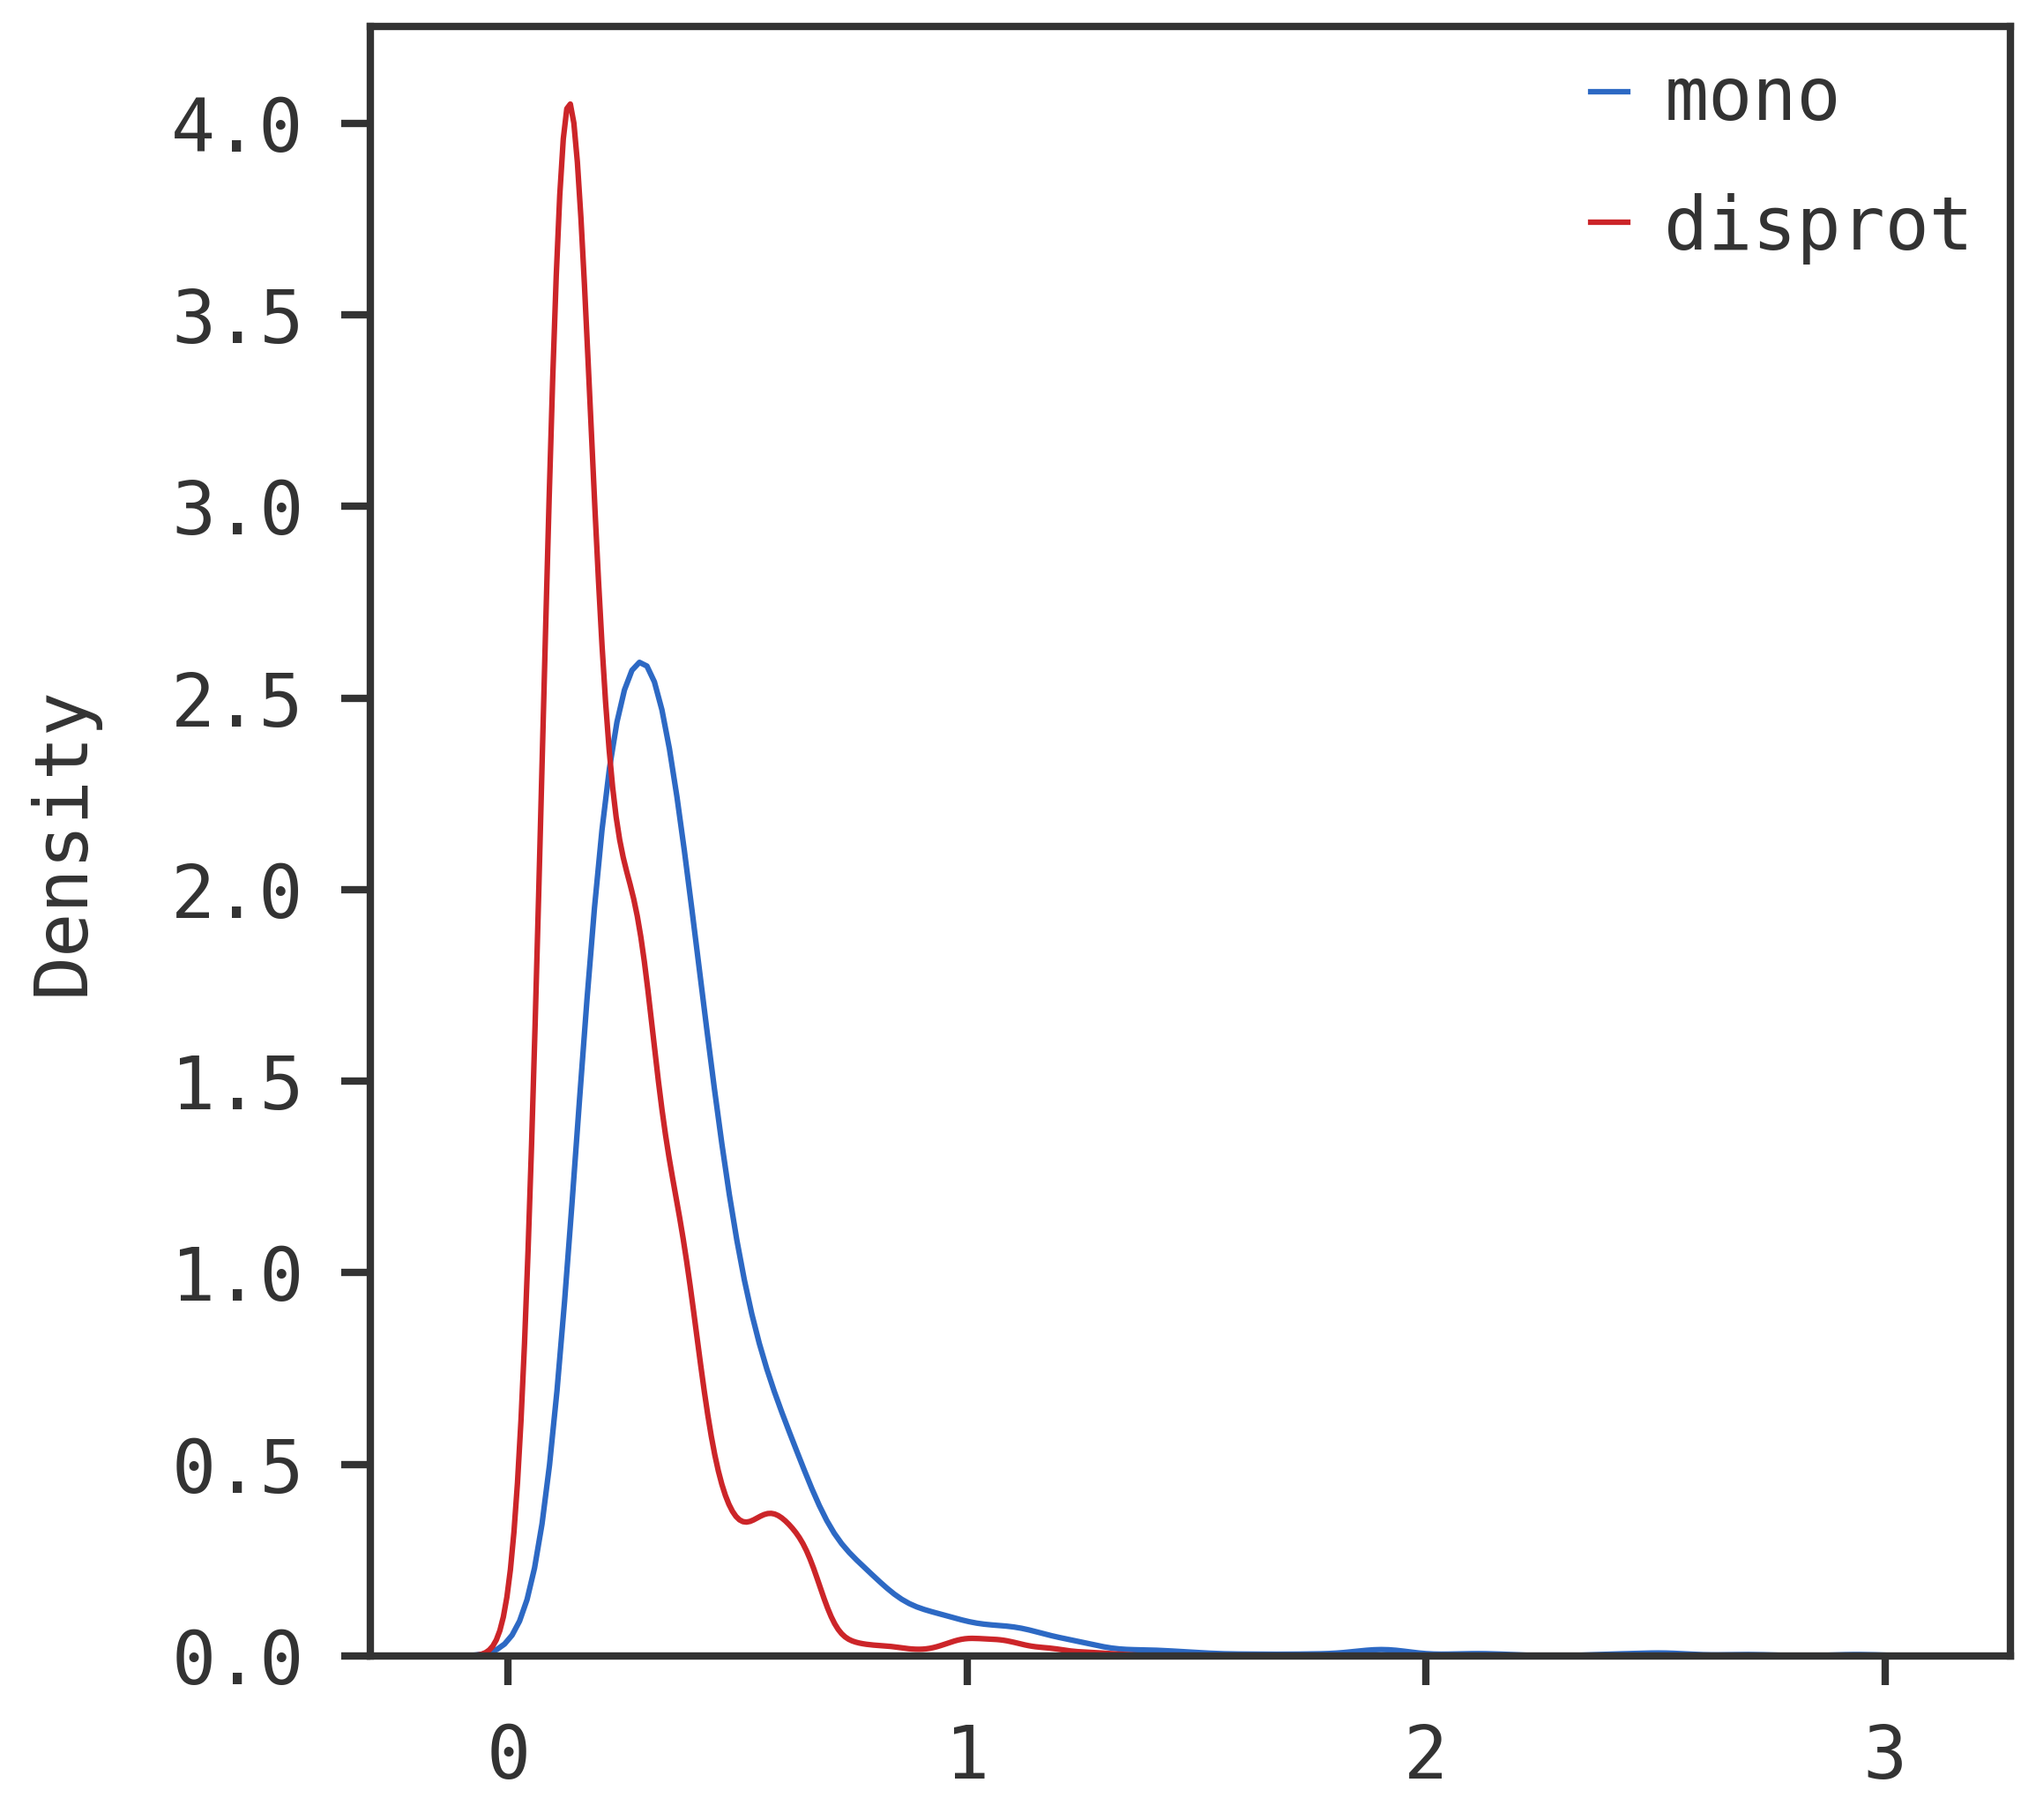

In [18]:

sns.kdeplot(mono_allfiveloss, label="mono")
sns.kdeplot(disprot_allfiveloss, label="disprot")
plt.legend()
plt.show()

/home/franco/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/franco/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/franco/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/franco/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

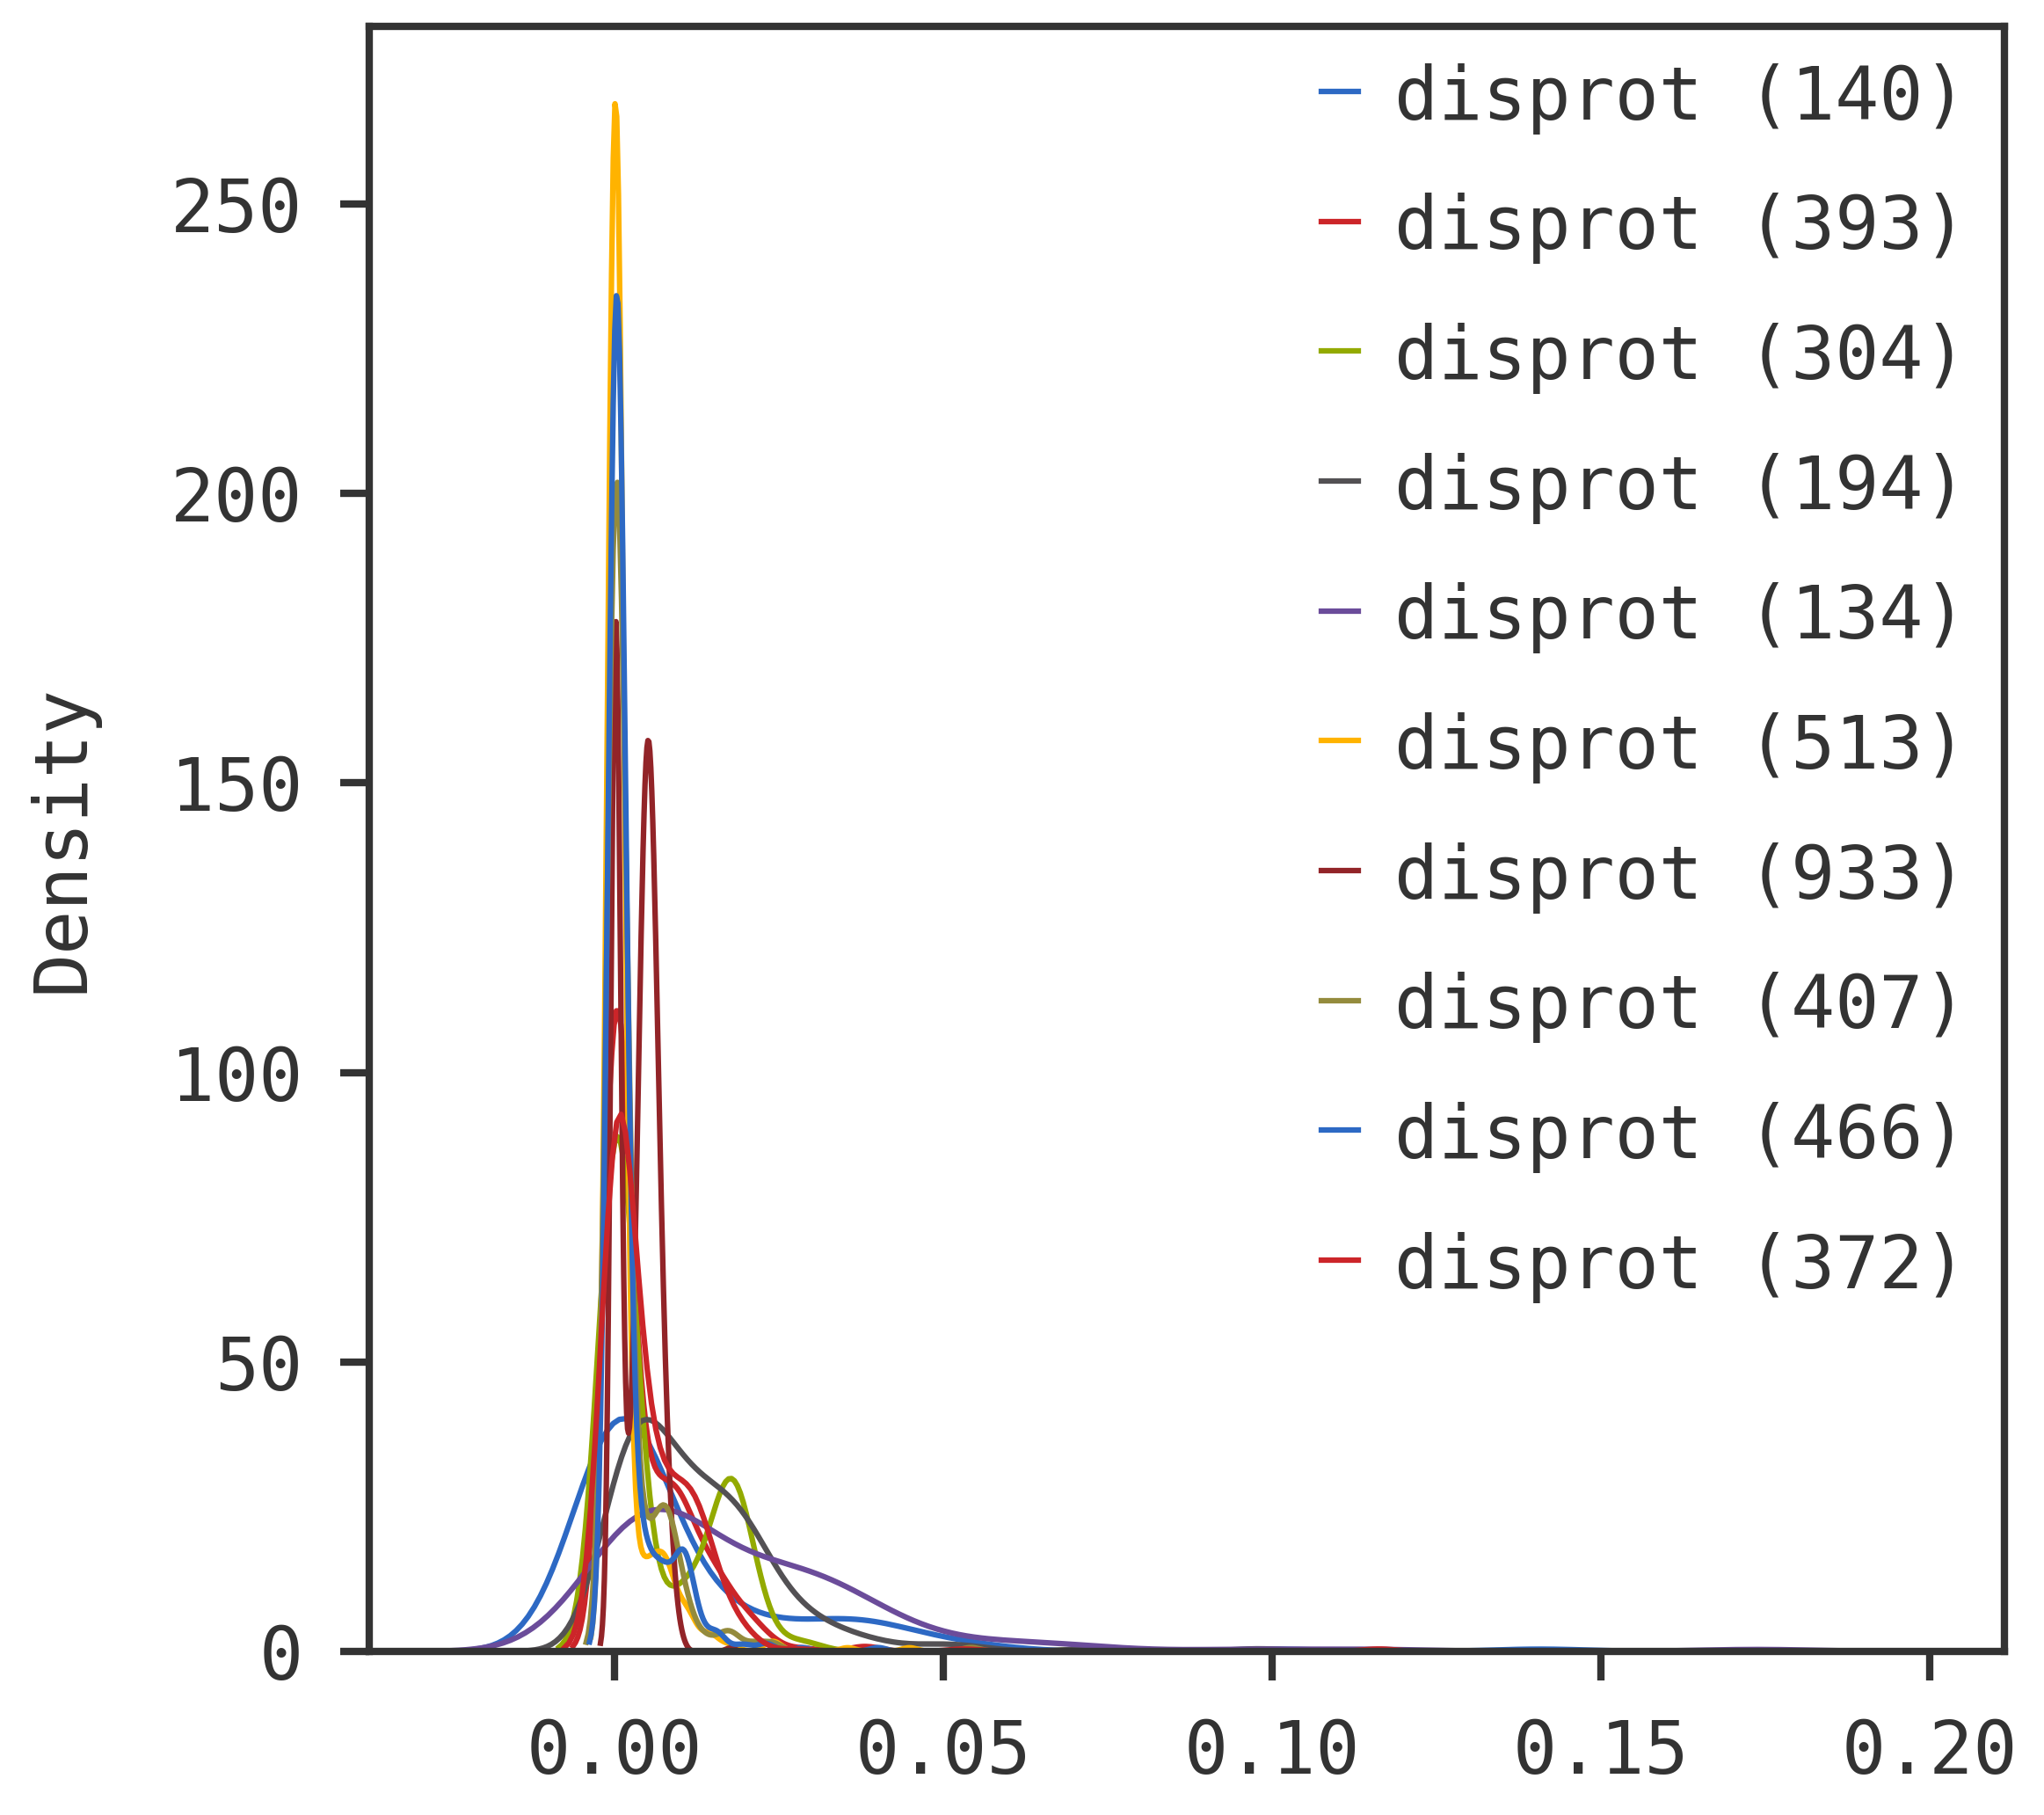

In [19]:
mono_allloss = list()
disprot_allloss = list()
# for protid in mono_singleloss.keys():
#     data = mono_singleloss[protid]['singleaa_loss']
#     sns.kdeplot(data, label=f"mono ({len(data)})")
    
for protid in disprot_loss.keys():
    data = np.array(disprot_loss[protid]['aa1_loss'])
    #sns.kdeplot(data*len(data), label=f"disprot ({len(data)})")
    sns.kdeplot(data, label=f"disprot ({len(data)})")
    
plt.legend()
plt.show()

In [21]:
## find loss per aa type
from collections import defaultdict

aa_dict = defaultdict(list)
for protid in disprot_loss.keys():
    print(protid)
    seq = disprot_dict[protid]['seq']
    data = np.array(disprot_loss[protid]['aa1_loss'])
    for i in range(len(data)):
        aa_dict[seq[i]].append(data[i])
    break

P37840


/home/franco/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/franco/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/franco/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/franco/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

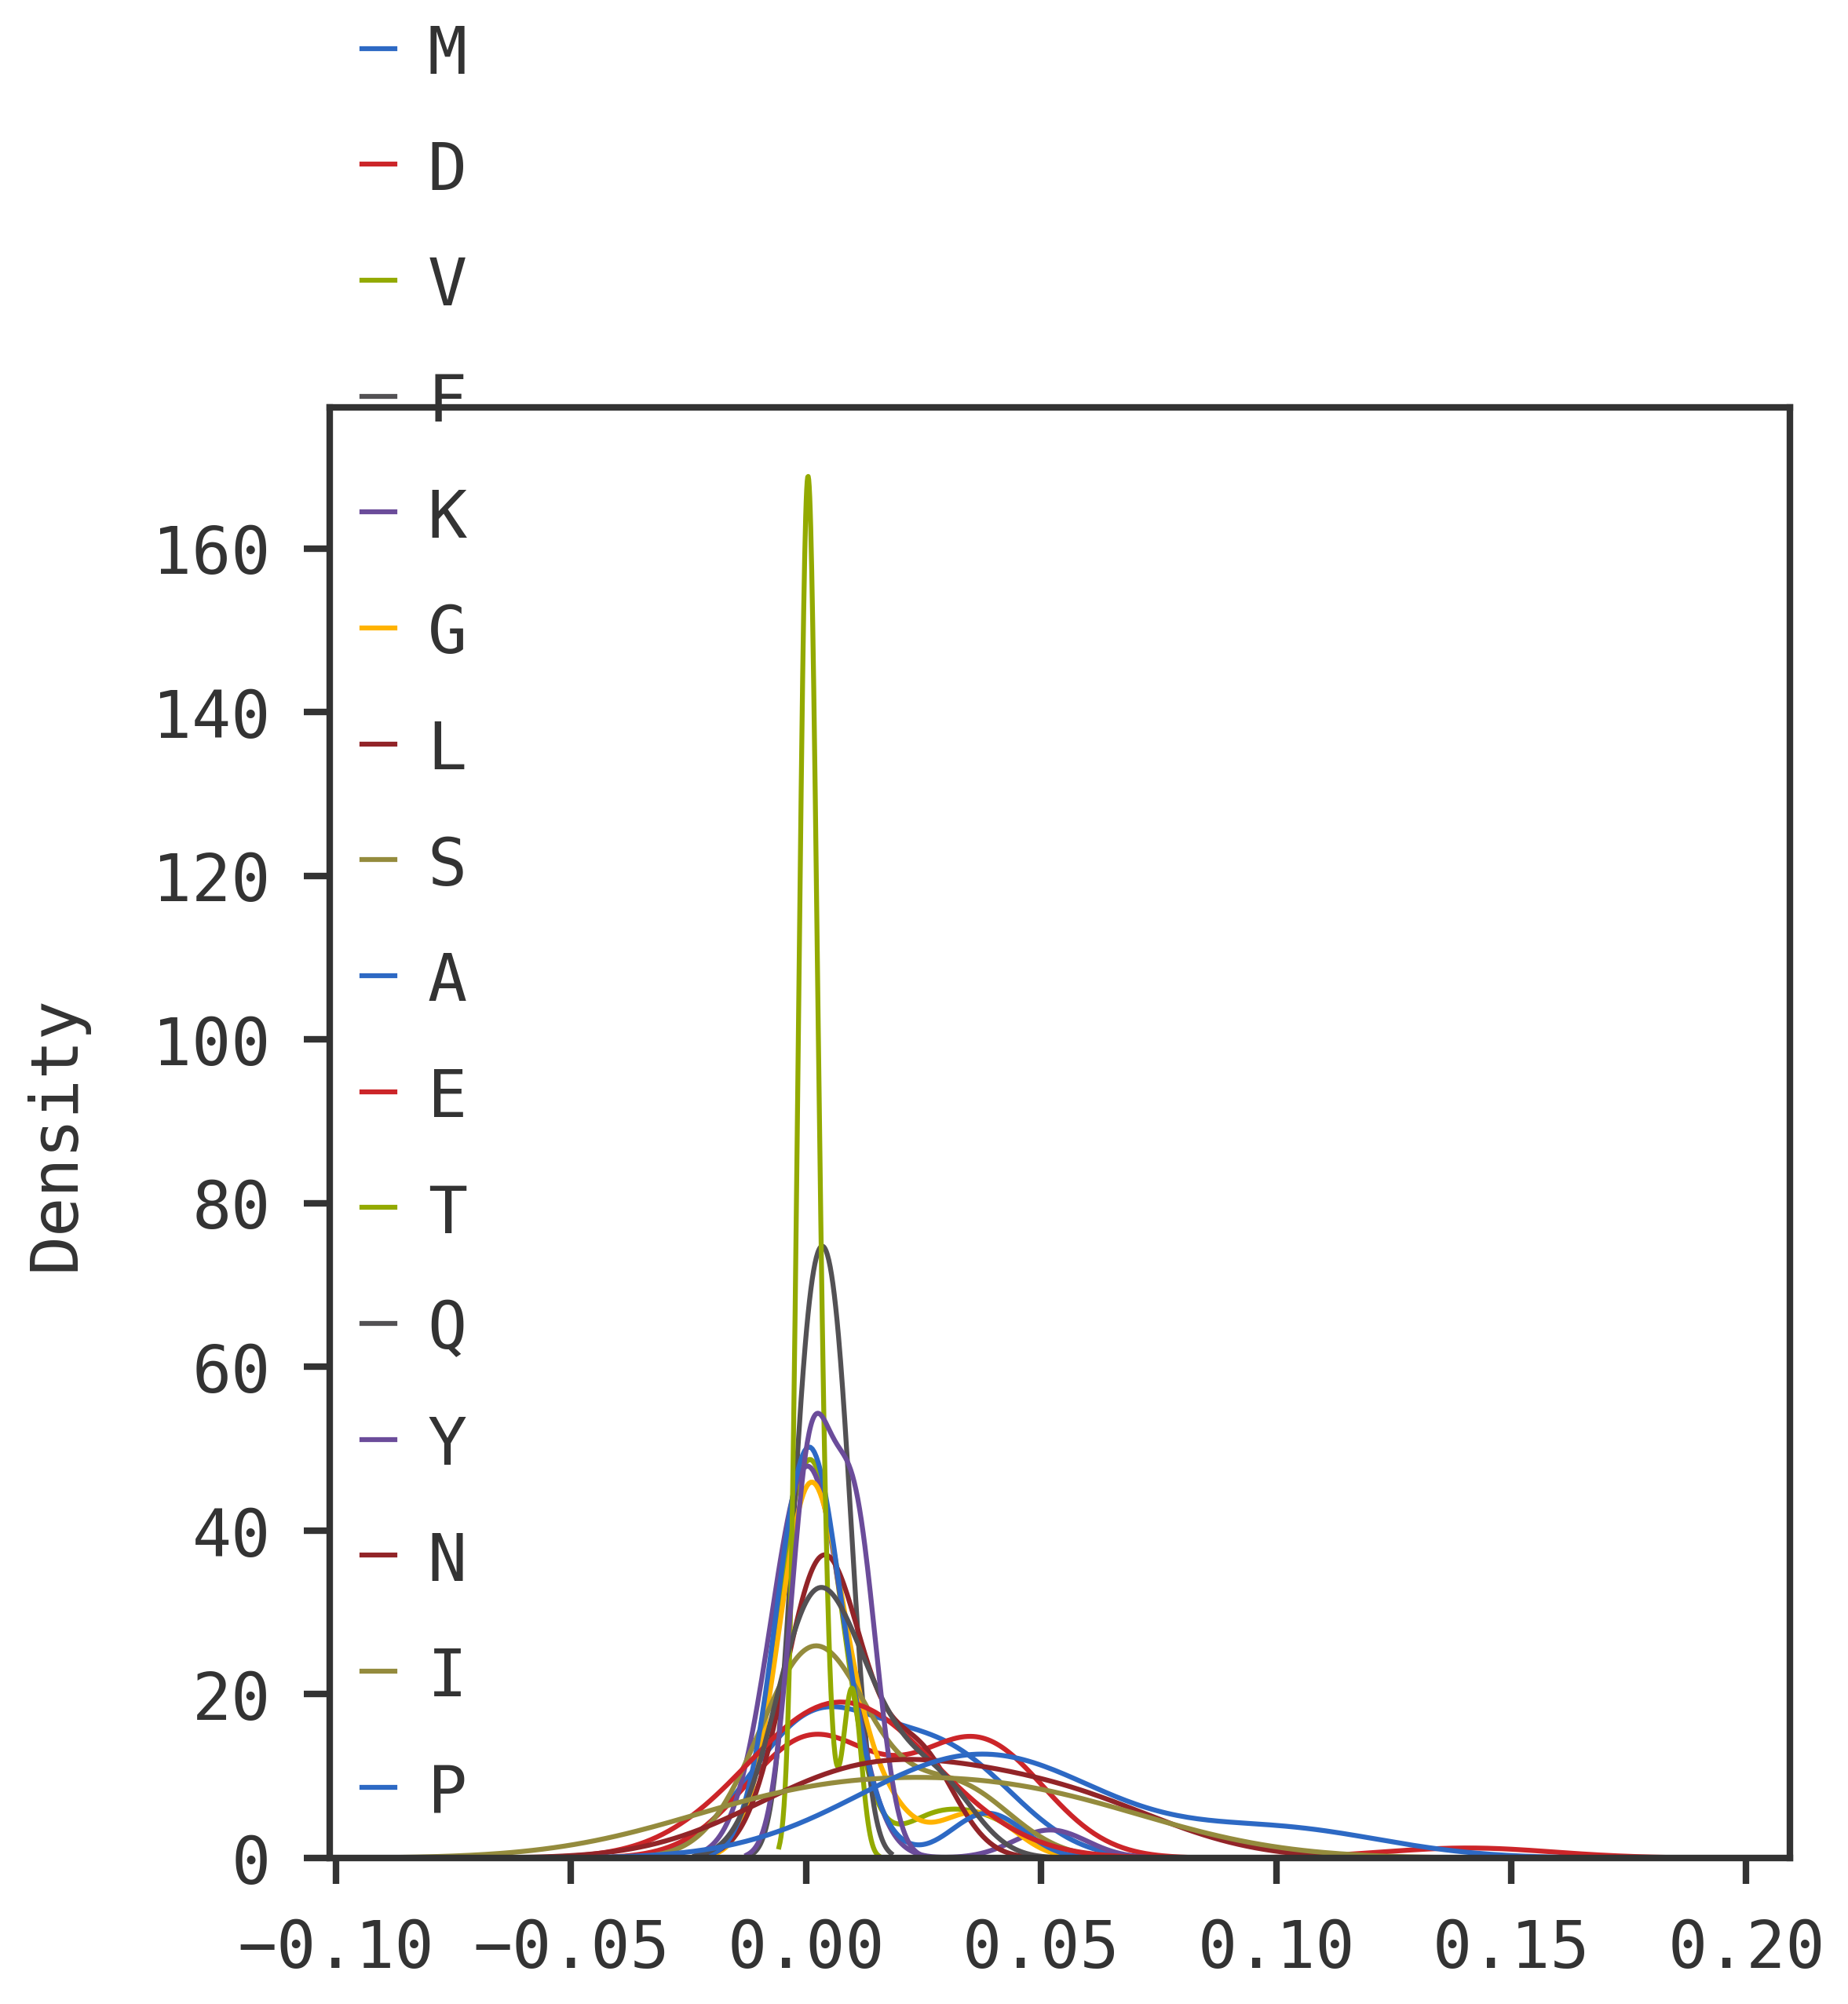

In [22]:
for AA in aa_dict.keys():
    data = np.array(aa_dict[AA])
    sns.kdeplot(data, label=f"{AA}")
    
plt.legend()
plt.show()

In [23]:
aa_dict

defaultdict(list,
            {'M': [9.292364120483398e-05,
              0.0004031658172607422,
              0.03533935546875,
              0.02093505859375],
             'D': [0.0005388259887695312,
              0.00038504600524902344,
              0.036376953125,
              0.033660888671875,
              0.03961181640625,
              0.0015172958374023438],
             'V': [0.00069427490234375,
              0.0012521743774414062,
              0.00038814544677734375,
              0.0029506683349609375,
              0.0026607513427734375,
              5.745887756347656e-05,
              0.0001499652862548828,
              0.00020492076873779297,
              0.041259765625,
              8.89897346496582e-05,
              0.0244598388671875,
              0.00015985965728759766,
              0.00039386749267578125,
              0.0006113052368164062,
              0.000213623046875,
              2.47955322265625e-05,
              7.62939453125e-05,
         